In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('BTC-USD(1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [49]:
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

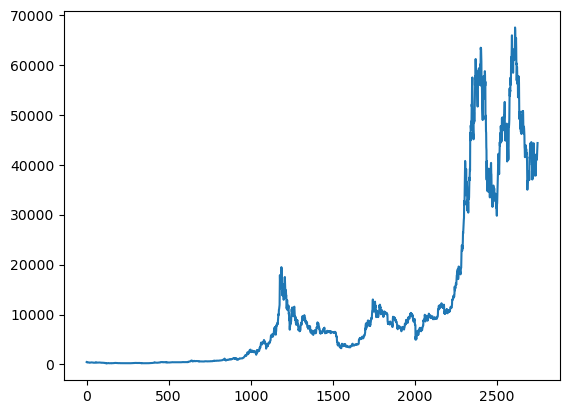

In [50]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [51]:
# Train test split
to_row =int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

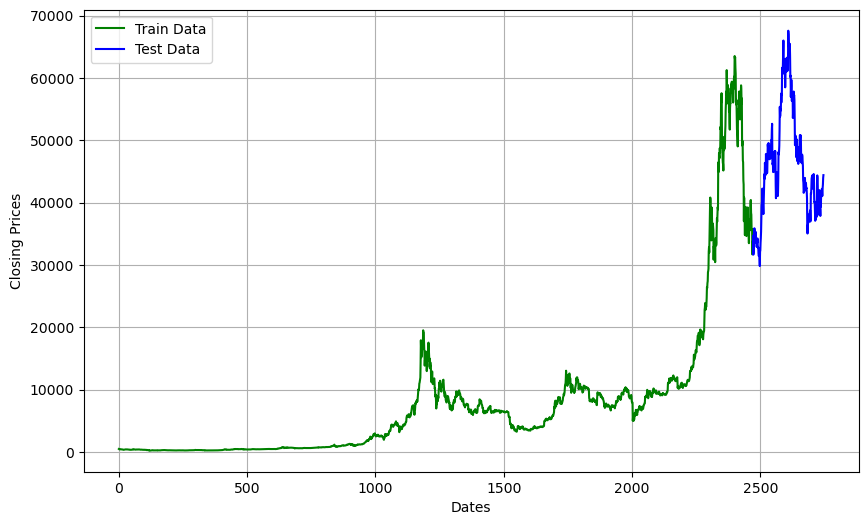

In [52]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

# Ensure correct color names
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test Data')

plt.legend()
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

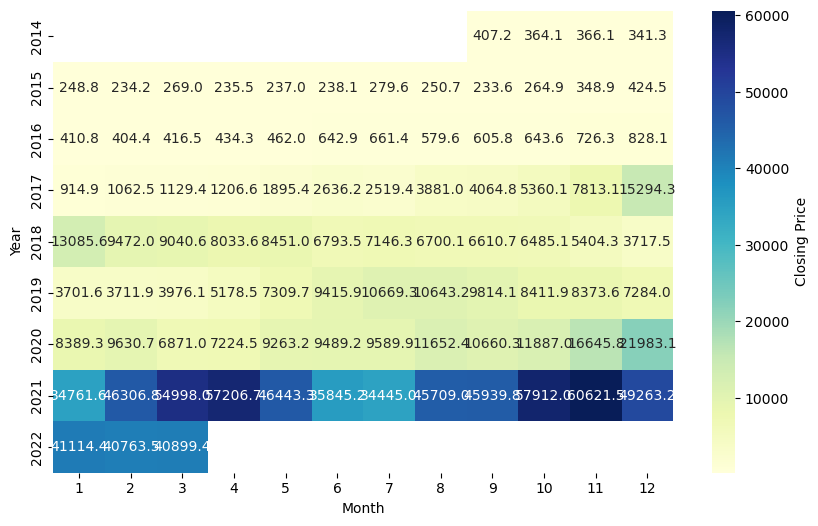

In [90]:
# Ensure the Date column is in DateTime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
# Pivot the data to create a matrix with months as columns and years as rows
heatmap_data = df.pivot_table(values='Adj Close', index='Year', columns='Month')
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Closing Price'})

In [53]:
model_prediction =[]
n_test_obser = len(testing_data)

In [74]:
#in order of (p,d,q) 
for i in range(n_test_obser):
    model=ARIMA(training_data,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output
    model_prediction.append(yhat)
    
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
    #yhat in output that is actual arruracy

In [76]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2747
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22212.755
Date:                Mon, 11 Nov 2024   AIC                          44435.510
Time:                        21:08:46   BIC                          44465.100
Sample:                             0   HQIC                         44446.201
                               - 2747                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0220      0.010     -2.277      0.023      -0.041      -0.003
ar.L2         -0.0042      0.009     -0.457      0.647      -0.022       0.014
ar.L3          0.0071      0.010      0.722      0.4

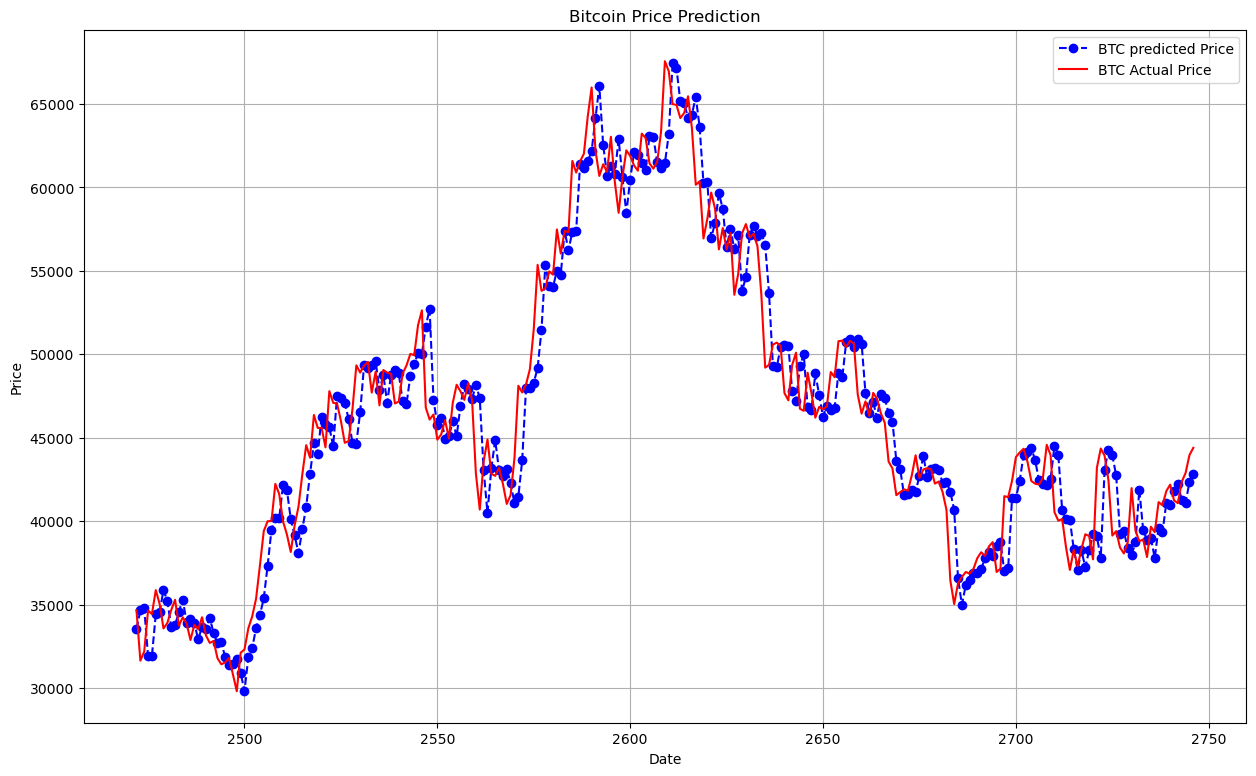

In [84]:
plt.figure(figsize=(15,9))
plt.grid(True)
data_range=df[to_row:].index
plt.plot(data_range,model_prediction[:-1],color='blue',marker='o',linestyle='dashed',label='BTC predicted Price')
plt.plot(data_range,testing_data,color='red',label='BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [86]:
#report performance
mape=np.mean(np.abs(np.array(model_prediction[:-1])-np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) #Mean Absolute Percentage Error

MAPE: 0.22028072422902006
